##Multivariate Regression
###Gradient Descent
Ideal for when N is very large $N =~ 10^{6}$

In [5]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#prepare data
data = pandas.read_csv('ex1data2.txt', header=None, names=['x1', 'x2', 'y'])
X = data[['x1', 'x2']].values
Y = data['y'].values
m = len(X)

#initialize gradient descent parameters
alpha = 0.01
theta = np.zeros(3)
iterations = 4000

#feature normalize
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_norm = (X-mu)/sigma
#add a dummy one's column in X_norm for theta 0
X_norm = np.insert(X_norm, 0, 1, 1)

def compute_cost_multi(X_norm, y, theta):
    
    #compute the cost
    H = np.dot(X_norm, theta)
    J = 1/(2*m) * np.sum([(H[i]-Y[i])**2 for i in range (m)])
    return J

def gradient_descent_multi(X, y, theta, alpha, num_iters):
        
    # Initialize
    J_history = np.zeros(num_iters)
    T_history = np.zeros((num_iters,X.shape[1]))
    
    #perform iterations
    for i in range(num_iters):
        T_history[i] = theta

        H = np.dot(X, theta)
        theta0 = alpha * 1/m * np.sum([(H[i]-Y[i])*X[i,0] for i in range (m)])
        theta1 = alpha * 1/m * np.sum([(H[i]-Y[i])*X[i,1] for i in range (m)])
        theta2 = alpha * 1/m * np.sum([(H[i]-Y[i])*X[i,2] for i in range (m)])
        
        theta[0] = theta[0] - theta0
        theta[1] = theta[1] - theta1 
        theta[2] = theta[2] - theta2
        
        ### =====================================
        
        J_history[i] = compute_cost_multi(X, y, theta)
    return theta, J_history, T_history

theta, J_history, T_history = gradient_descent_multi(X_norm, Y, theta, alpha, iterations)

theta

array([ 340412.65957447,  109447.79520343,   -6578.35358795])

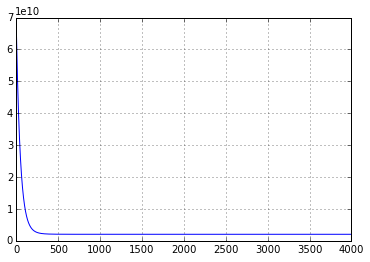

In [6]:
pandas.Series(J_history).plot()

In [7]:
#price prediction using gradient descent
T = [1650, 3]
T_norm = (T-mu)/sigma
T_norm = np.insert(T_norm, 0, 1, 0)
price = np.dot(T_norm, theta)

# ============================================================

price

293081.46461339662

###The Normal Equation
Analytical solution ideal when $N < 10^{6}$

we take advantage of the following identity:

$\frac{1}{2}(X\theta-\vec{y})^T(X\theta-\vec{y})=\frac{1}{2}\sum\limits_{i=1}^{m} (h_\theta(x^(i)-y^(i))^2=J(\theta)$

In [8]:
###linear regression using the normal equation
#prepare data
data = pandas.read_csv('ex1data2.txt', header=None, names=['x1', 'x2', 'y'])
X = data[['x1', 'x2']].values
Y = data['y'].values
X = np.insert(X, 0, 1, 1)
Xt = np.transpose(X)

def normal_eqn(X, Y):
    XX = np.linalg.inv(np.dot(np.transpose(X),X))
    XY = np.dot(np.transpose(X),Y)
    thetan = np.dot(XX,XY)
    return thetan

thetan = normal_eqn(X, Y)
thetan

array([ 89597.9095428 ,    139.21067402,  -8738.01911233])

In [9]:
#price prediction using normal equation
T = [1, 1650, 3]
price = np.dot(T, thetan)
price

293081.46433489729

##Logistic Regression
We introduce this function in classification problems (where y is discrete [0,1]). Because y is either zero or one, we want our hypothesis function to have values between zero and one. We implement this by introducing a sigmoidal (S-shape) function that operates on theta. However, there are other smooth functions we could have chosen.

i.e. ...

The cost function in logistic regression is

$J(\theta)=\frac{1}{m}\sum\limits_{i=1}^{m} (-y^ilog(h_\theta(x^i))-(1-y^i)log(1-h_\theta(x^i))$

where the hypothesis

$h_\theta(x)=g(\theta^Tx)$

includes the sigmoid function

$g(z)=\frac{1}{1+e^-z}$

in order to range our hypothesis from 0 to 1

In [10]:
import pandas
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

data1 = pandas.read_csv("ex2data1.txt", header=None, names=['test1', 'test2', 'accepted'])
X = data1[['test1', 'test2']].values
y = data1.accepted.values
m, n = X.shape
X = np.insert(X, 0, np.ones(len(X)), 1)
theta = np.zeros(n + 1)

def sigmoid(z):
    
    g = 1/(1+np.exp(-z))
    return g

def cost(X, Y, theta, lambda_=0):
    
    J = 0
    H = sigmoid(np.dot(X, theta))
    J = 1/(m) * np.sum(-Y[i]*np.log(H[i])-(1-Y[i])*np.log(1-H[i]) for i in range (m))   
    return J

def gradient(X, Y, theta, lambda_=0):
    
    grad = np.zeros(theta.shape)
    H = sigmoid(np.dot(X, theta))   
    grad = (1/m)*(H - np.mat(Y))*X
    
    return np.ravel(grad)
cost(X, y, np.array(theta))
gradient(X, y, np.array([0.0,0.0,0.0]))

array([ -0.1       , -12.00921659, -11.26284221])

### Optimization Using Fminunc
We use a built-in scipy function to optimize our values for theta

In [11]:
def mycost(t):
    return cost(X, y, t)

def mygrad(t):
    return gradient(X, y, t)

optimal_theta = scipy.optimize.fmin_ncg(mycost, theta, fprime=mygrad)
optimal_theta

Optimization terminated successfully.
         Current function value: 0.203539
         Iterations: 26
         Function evaluations: 71
         Gradient evaluations: 220
         Hessian evaluations: 0


array([-24.64188395,   0.20207862,   0.1972666 ])

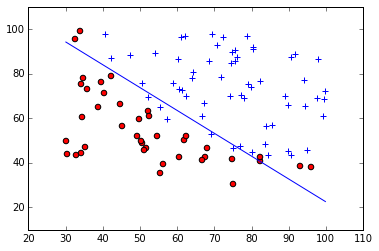

In [12]:
def plotData(data):
    fig, ax = plt.subplots()
    results_accepted = data[data.accepted == 1]
    results_rejected = data[data.accepted == 0]
    ax.scatter(results_accepted.test1, results_accepted.test2, marker='+', c='b', s=40)
    ax.scatter(results_rejected.test1, results_rejected.test2, marker='o', c='r', s=30)
    return ax

ax = plotData(data1)
x_plot = np.array([np.max(X[:, 1]), np.min(X[:,1])])
y_plot = (-optimal_theta[0] - optimal_theta[1]*x_plot) / (optimal_theta[2])
ax.plot(x_plot, y_plot)

###Predict
Let's use optimized theta to predict if a student will be accepted

In [13]:
def predict(t, x):
    T = [1, t, x]
    p = np.zeros(m)
    H = sigmoid(np.dot(T, optimal_theta))
       
    if H >= 0.5:
        p = 'accepted'
    else:
        p = 'rejected'
      
    return p


###Regularized Logistic Regression

The cost function in regularized logistic regression is

$J(\theta)=\frac{1}{m}\sum\limits_{i=1}^{m} (-y^ilog(h_\theta(x^i))-(1-y^i)log(1-h_\theta(x^i))+\frac{\lambda}{2m}\sum\limits_{j=2}^{n} \theta_j^2$

where the hypothesis

$h_\theta(x)=g(\theta^Tx)$

includes the sigmoid function

$g(z)=\frac{1}{1+e^-z}$

in order to range our hypothesis from 0 to 1

we also map the features into polynomial terms of $x_1$ and $x_2$ up to the sixth power in order to fit the non-linear data. This mapping results in a 28-dimensional vector

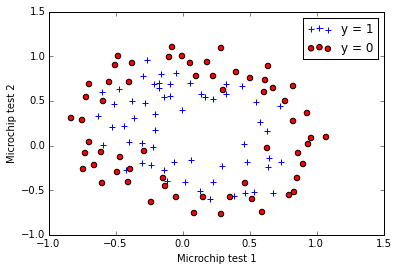

In [14]:
data2 = pandas.read_csv("./ex2data2.txt", header=None, names=['test1', 'test2', 'accepted'])
ax = plotData(data2)
ax.legend(['y = 1', 'y = 0'], loc='best')
ax.set_xlabel('Microchip test 1')
ax.set_ylabel('Microchip test 2')

In [15]:
#map the features
def mapFeature(x1, x2):
    ret = np.array([x1**(i-j) * x2**j 
                    for i in range(1,7) for j in range(i+1)
                   ])
    return np.insert(ret, 0, np.ones(len(x1)), 0).T



X = mapFeature(data2.test1, data2.test2)
y = data2.accepted.values
initial_theta = np.zeros(X.shape[1])
X.shape, y.shape, initial_theta.shape

cost(X, y, initial_theta, lambda_=0) 
mapFeature(np.array([2,3]),np.array([3,2]))[:, :10]

array([[ 1,  2,  3,  4,  6,  9,  8, 12, 18, 27],
       [ 1,  3,  2,  9,  6,  4, 27, 18, 12,  8]])

In [16]:
lambda_ = 100

#again use the built in optimization function
optimal_theta = scipy.optimize.fmin_bfgs(lambda t: cost(X, y, t, lambda_),
                                        initial_theta,
                                        lambda t: gradient(X, y, t, lambda_))
optimal_theta

         Current function value: 0.369277
         Iterations: 13
         Function evaluations: 59
         Gradient evaluations: 48


array([  3.48063759e+00,   1.85328697e+00,   3.68925618e+00,
        -5.62027466e+00,  -1.80098623e+00,  -2.80518112e+00,
        -1.81591744e-01,  -7.90532241e-01,  -6.78392542e-01,
        -8.17850790e-01,  -4.54966120e+00,  -2.04211667e-01,
        -1.47102091e+00,  -4.92523193e-01,  -3.52248138e+00,
        -1.31469588e+00,  -5.59820902e-01,  -1.79831905e-01,
        -6.60041964e-01,  -5.95999807e-01,  -2.28684303e+00,
        -3.56063144e+00,  -5.32270794e-02,  -7.57415613e-01,
        -3.03516582e-03,  -8.33036362e-01,  -2.63322509e-01,
        -3.60562726e+00])

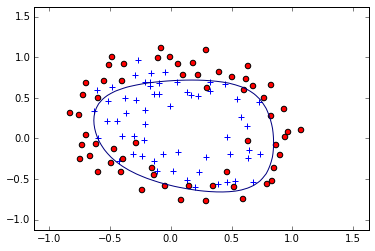

In [17]:
contour_x = np.linspace(-1, 1.5)
contour_y = np.linspace(-1, 1.5)
def calc_z(x, y):
    return mapFeature(np.array([x]), np.array([y])).dot(optimal_theta)

z = np.zeros((len(contour_x), len(contour_y)))
for i, c_x in enumerate(contour_x):
    for j, c_y in enumerate(contour_y):
        z[i,j] = calc_z(c_x, c_y)[0]
        
ax = plotData(data2)
ax.contour(contour_x, contour_y, z, levels=[0])

Optimization terminated successfully.
         Current function value: 0.224569
         Iterations: 546
         Function evaluations: 547
         Gradient evaluations: 547


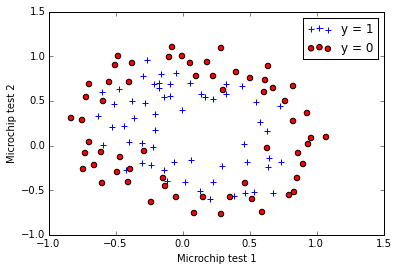

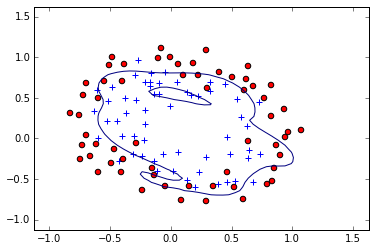

In [18]:
import pandas
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

data2 = pandas.read_csv("./ex2data2.txt", header=None, names=['test1', 'test2', 'accepted'])
X = data2[['test1', 'test2']].values
y = data2.accepted.values
m, n = X.shape
X = np.insert(X, 0, np.ones(len(X)), 1)


def sigmoid(z):
    
    g = 1/(1+np.exp(-z))
    return g

theta = np.zeros(n + 1)

def cost(X, Y, theta, lambda_=0):
    
    J = 0
    H = sigmoid(np.dot(X, theta))
    J = 1/(m) * np.sum(-Y[i]*np.log(H[i])-(1-Y[i])*np.log(1-H[i]) for i in range (m))   
    return J

def gradient(X, Y, theta, lambda_=0):
    
    grad = np.zeros(theta.shape)
    H = sigmoid(np.dot(X, theta))   
    grad = (1/m)*(H - np.mat(Y))*X
    
    return np.ravel(grad)



initial_theta = np.zeros(n + 1)

cost(X, y, np.array(theta))
gradient(X, y, np.array([0.0,0.0,0.0]))



data2 = pandas.read_csv("./ex2data2.txt", header=None, names=['test1', 'test2', 'accepted'])
data2.head()

ax = plotData(data2)
ax.legend(['y = 1', 'y = 0'], loc='best')
ax.set_xlabel('Microchip test 1')
ax.set_ylabel('Microchip test 2')

def mapFeature(x1, x2):
    ret = np.array([x1**(i-j) * x2**j 
                    for i in range(1,7) for j in range(i+1)
                   ])
    return np.insert(ret, 0, np.ones(len(x1)), 0).T

mapFeature(np.array([2,3]),np.array([3,2]))[:, :10]

X = mapFeature(data2.test1, data2.test2)
y = data2.accepted.values
initial_theta = np.zeros(X.shape[1])
X.shape, y.shape, initial_theta.shape

cost(X, y, initial_theta, lambda_=0) 

lambda_ = 100

optimal_theta = scipy.optimize.fmin_bfgs(lambda t: cost(X, y, t, lambda_),
                                        initial_theta,
                                        lambda t: gradient(X, y, t, lambda_))
optimal_theta

contour_x = np.linspace(-1, 1.5)
contour_y = np.linspace(-1, 1.5)
def calc_z(x, y):
    return mapFeature(np.array([x]), np.array([y])).dot(optimal_theta)

z = np.zeros((len(contour_x), len(contour_y)))
for i, c_x in enumerate(contour_x):
    for j, c_y in enumerate(contour_y):
        z[i,j] = calc_z(c_x, c_y)[0]
        
ax = plotData(data2)
ax.contour(contour_x, contour_y, z, levels=[0])

##Neural Networks


###Overview

The "activation" of unit i in layer j in a neural network consisting of 3 units and a bias unit ($x_0$) in layer $j-1$ is given by

$a_i^j=g(\Theta_{i0}^{j-1}x_0+\Theta_{i1}^{j-1}x_1+\Theta_{i2}^{j-1}x_2+\Theta_{i3}^{j-1}x_3)$

if there are three units in layer $j$ and three units in layer $j-1$,  then $\Theta^1$ will be a $3x4$ dimensional matrix

i.e. if the network has $s_j$ units in layer $j$, $s_{j+1}$ units in layer $j+1$, then $\Theta^j$ has dimensions $s_{j+1}$ x $(s_j+1)$

we use these activations to compute the hypothesis:

$h_\Theta(x)=a_1^3=g(\Theta_{10}^2a_0^2+\Theta_{11}^2a_1^2+\Theta_{12}^2a_2^2+\Theta_{13}^2a_3^2)$



###Implementation

To implement a feedforward neural network (as opposed to a recurrent neural network) we can implement in a vectorized form:

$z^2=\Theta^1a^1=\begin{bmatrix}
z_1^2 \\
z_2^2 \\
z_3^2 \\
\end{bmatrix}$ 

and now the previously defined "activation" $a_i^j$ is a vector of all i units:

$a^j=g(z^j)$ and for a three layer network: $h_\Theta(x)=a^3=g(z^3)$

where g is the sigmoid function:

$g(z)=\frac{1}{1+e^-z}$

Note: $x$ can also be referred to as the activation of the first layer, i.e. $a^1$

The cost function for neural networks is a generalized version of the regularized cost function:

$J(\theta)=\frac{1}{m}\sum\limits_{i=1}^{m} (-y^ilog(h_\theta(x^i))-(1-y^i)log(1-h_\theta(x^i))+\frac{\lambda}{2m}\sum\limits_{j=2}^{n} \theta_j^2$

instead of one output, we generate outputs equal to the number of distinct classifications:

$J(\Theta)=\frac{1}{m}\sum\limits_{i=1}^{m} \sum\limits_{k=1}^{K} (-y_k^ilog(h_\Theta(x^i))_k-(1-y_k^i)log(1-(h_\Theta(x^i))_k)+\frac{\lambda}{2m}\sum\limits_{l=1}^{L-1}\sum\limits_{i=1}^{s_l}\sum\limits_{j=1}^{s_{l+1}} \theta_j^2$

###Novelty

what we are doing is essentially logistic regression, except the function mapping from layer one to layer two allows the algorithm to choose its own features!

Neural networks can have additional units and layers. Collectively, this is referred to as the network architecture.